In [1]:
%load_ext autoreload
%autoreload 2

In [71]:
from src.coordinator import Coordinator
from src.utils.preprocessing import TextPreprocessor
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
coord = Coordinator()

In [4]:
df = pd.read_json(coord.data_interim.joinpath('dataset_v1.jsonl'), lines=True)

In [5]:
df.head(3)

,tweet_id,user,time_epoch,tweet,n_likes,n_retweets,n_replies,n_emojis,quoted_tweet,hashtags,mentions,quoted_tweet_screen_name,quoted_tweet_name,quoted_tweet_hashtags,quoted_tweet_mentions,quoted_tweet_n_emojis
0,1249733419401183232,KimKardashian,1586794640,JUST RESTOCKED: the @SKIMS Waist Trainer — ava...,3850,166,340,0,,[],[skims],None,None,[],[],0
1,1249338384847220738,KimKardashian,1586700457,My sweet baby True. Happy 2nd Birthday! I wish...,30039,1075,174,2,,[],[],None,None,[],[],0
2,1249080285972410368,KimKardashian,1586638921,Does this ever happen to anyone else where you...,23384,797,2060,0,,[],[],None,None,[],[],0


In [7]:
print('Number of tweets with hashtags:', df['hashtags'].apply(lambda hashtags: bool(hashtags)).sum())
print('Number of hashtags:', df['hashtags'].apply(lambda hashtags: len(hashtags)).sum())

Number of tweets with hashtags: 56160
Number of hashtags: 71101


In [10]:
from collections import Counter

In [15]:
hashtags_stat = Counter()
df['hashtags'].apply(lambda hashtags: hashtags_stat.update(hashtags))
print('Number of unique hashtags:', len(hashtags_stat))

Number of unique hashtags: 22094


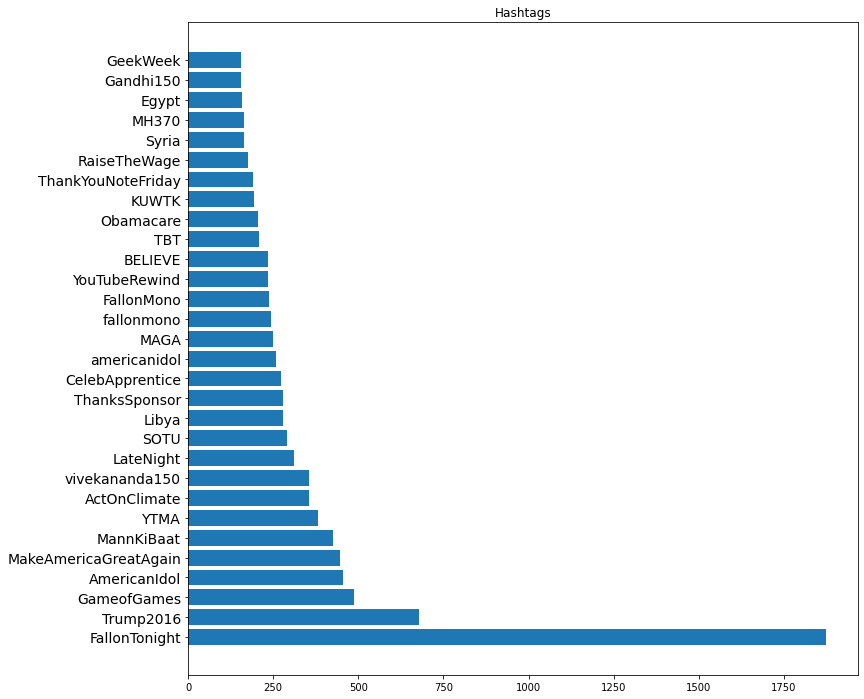

In [89]:
plt.figure(figsize=(12, 12))
plt.barh(*zip(*hashtags_stat.most_common(30)))
plt.yticks(size=14);
plt.title('Hashtags');

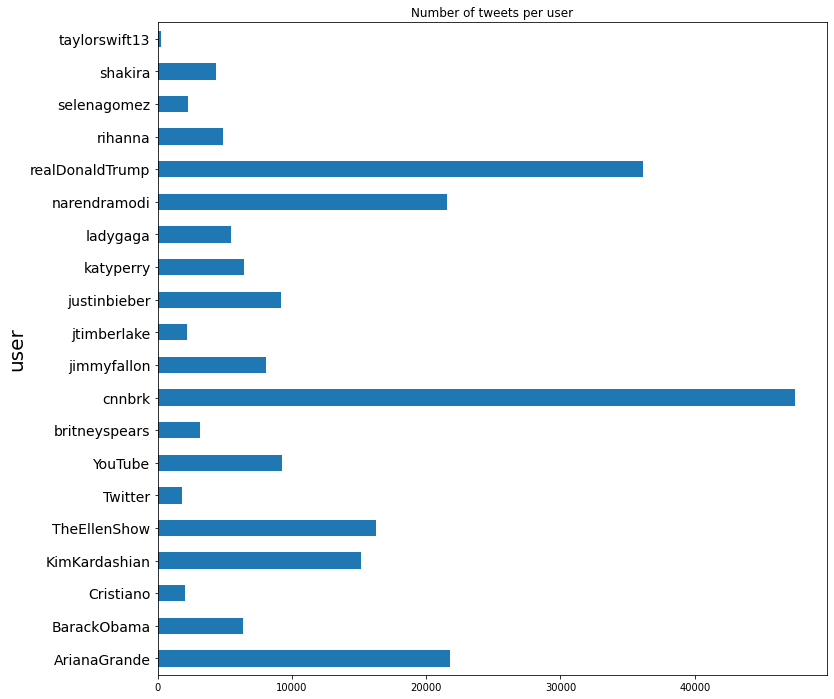

In [68]:
plt.figure(figsize=(12, 12))
df.groupby('user').size().plot(kind='barh');
plt.yticks(size=14);
plt.ylabel('user', size=20);
plt.title('Number of tweets per user');

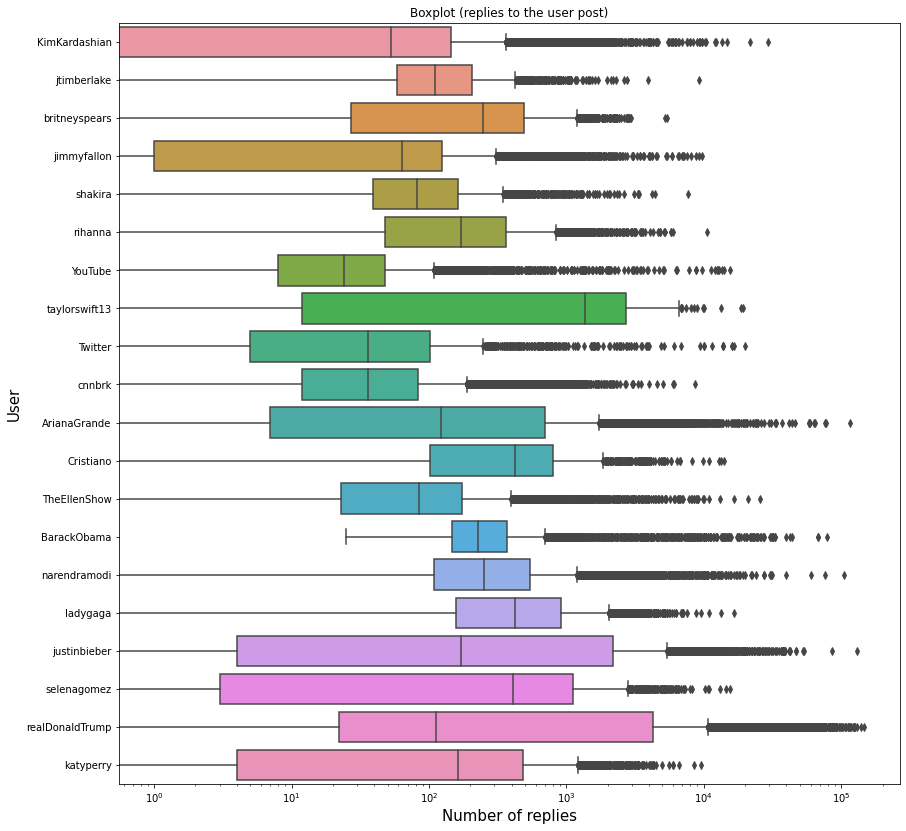

In [85]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xscale("log")
sns.boxplot(x="n_replies", y="user", data=df);
plt.ylabel('User', size=15);
plt.xlabel('Number of replies', size=15);
plt.title("Boxplot (replies to the user post)");

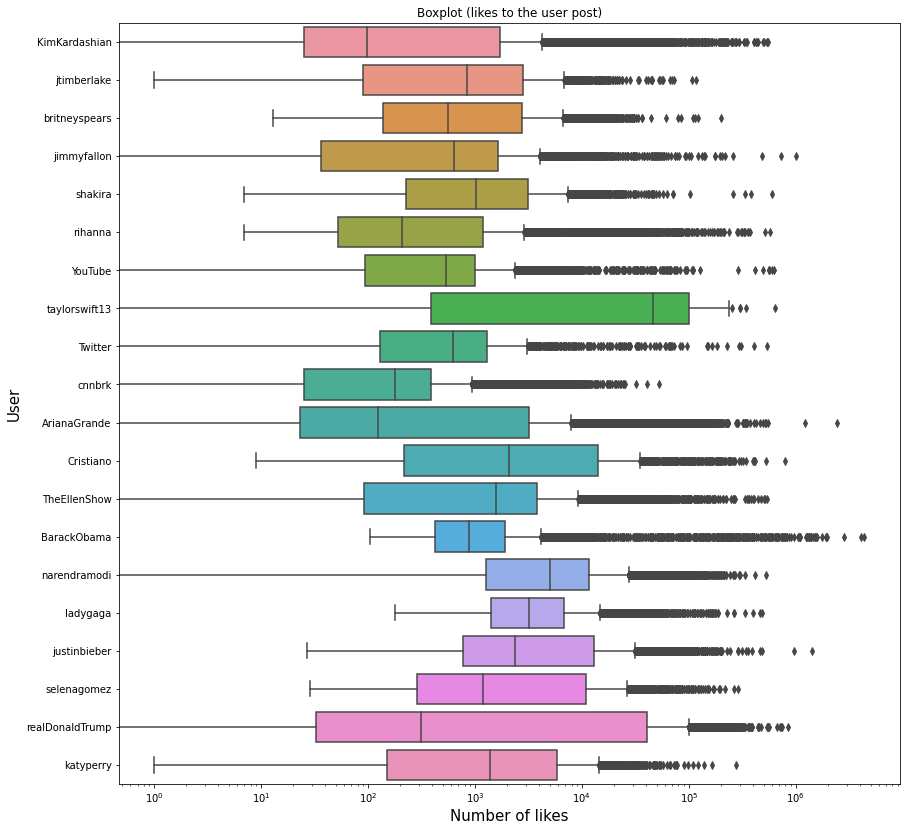

In [86]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xscale("log")
sns.boxplot(x="n_likes", y="user", data=df);
plt.ylabel('User', size=15);
plt.xlabel('Number of likes', size=15);
plt.title("Boxplot (likes to the user post)");

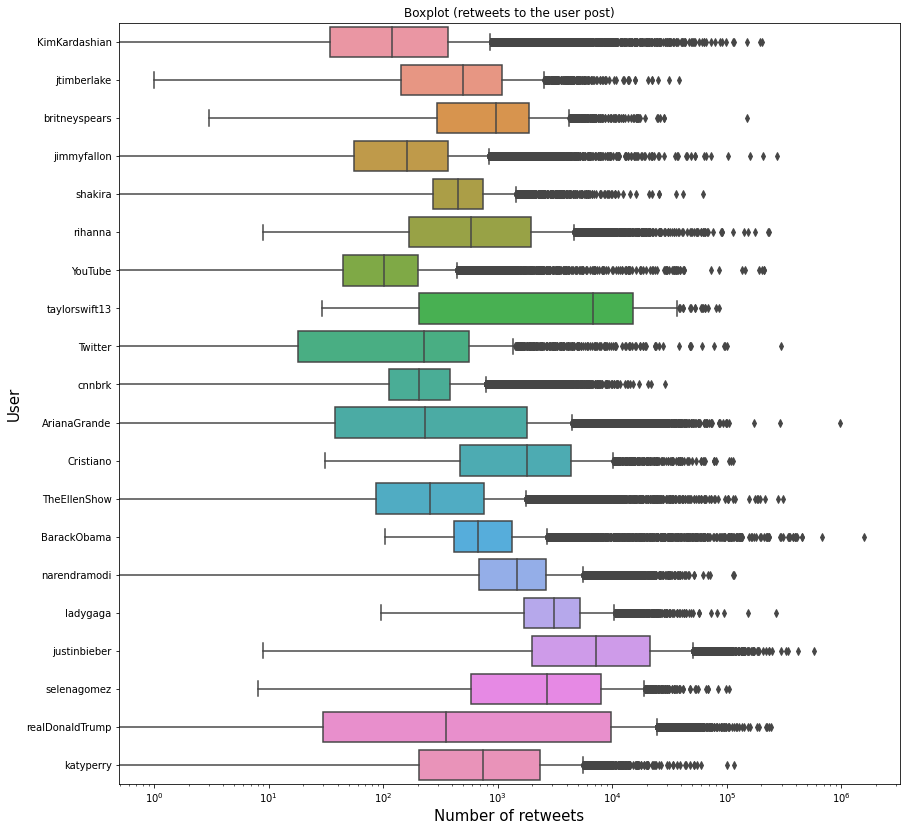

In [87]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xscale("log")
sns.boxplot(x="n_retweets", y="user", data=df);
plt.ylabel('User', size=15);
plt.xlabel('Number of retweets', size=15);
plt.title("Boxplot (retweets to the user post)");

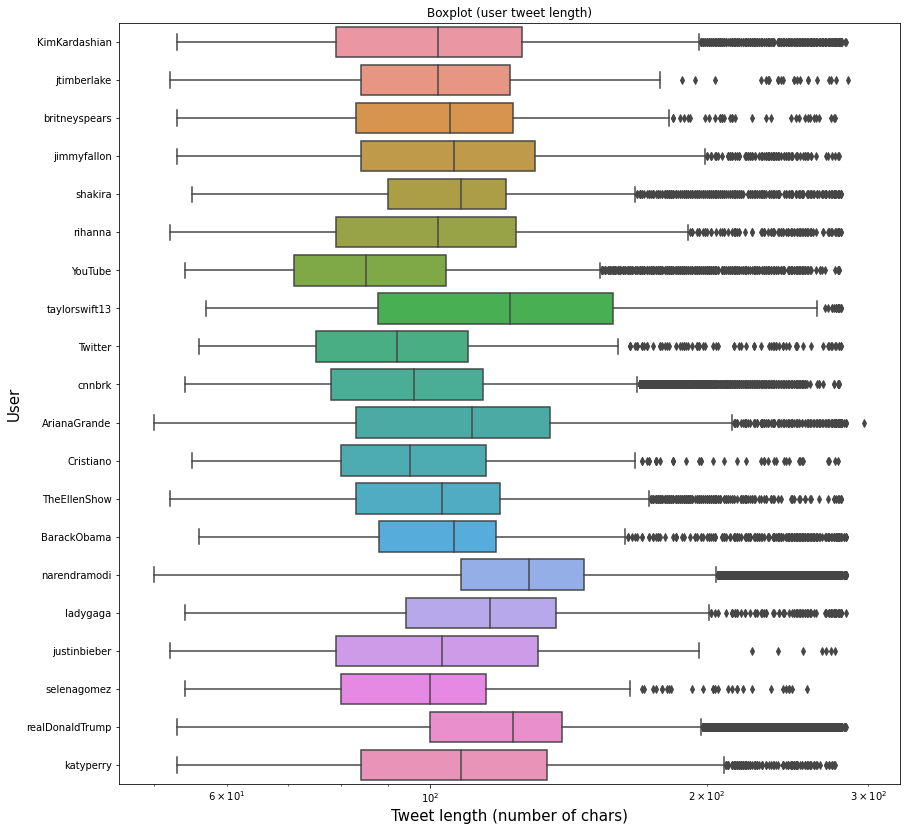

In [94]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xscale("log")
sns.boxplot(x=df['tweet'].apply(lambda tweet: len(tweet)), y="user", data=df);
plt.ylabel('User', size=15);
plt.xlabel('Tweet length (number of chars)', size=15);
plt.title("Boxplot (user tweet length)");

**Let's divide users by their account types**

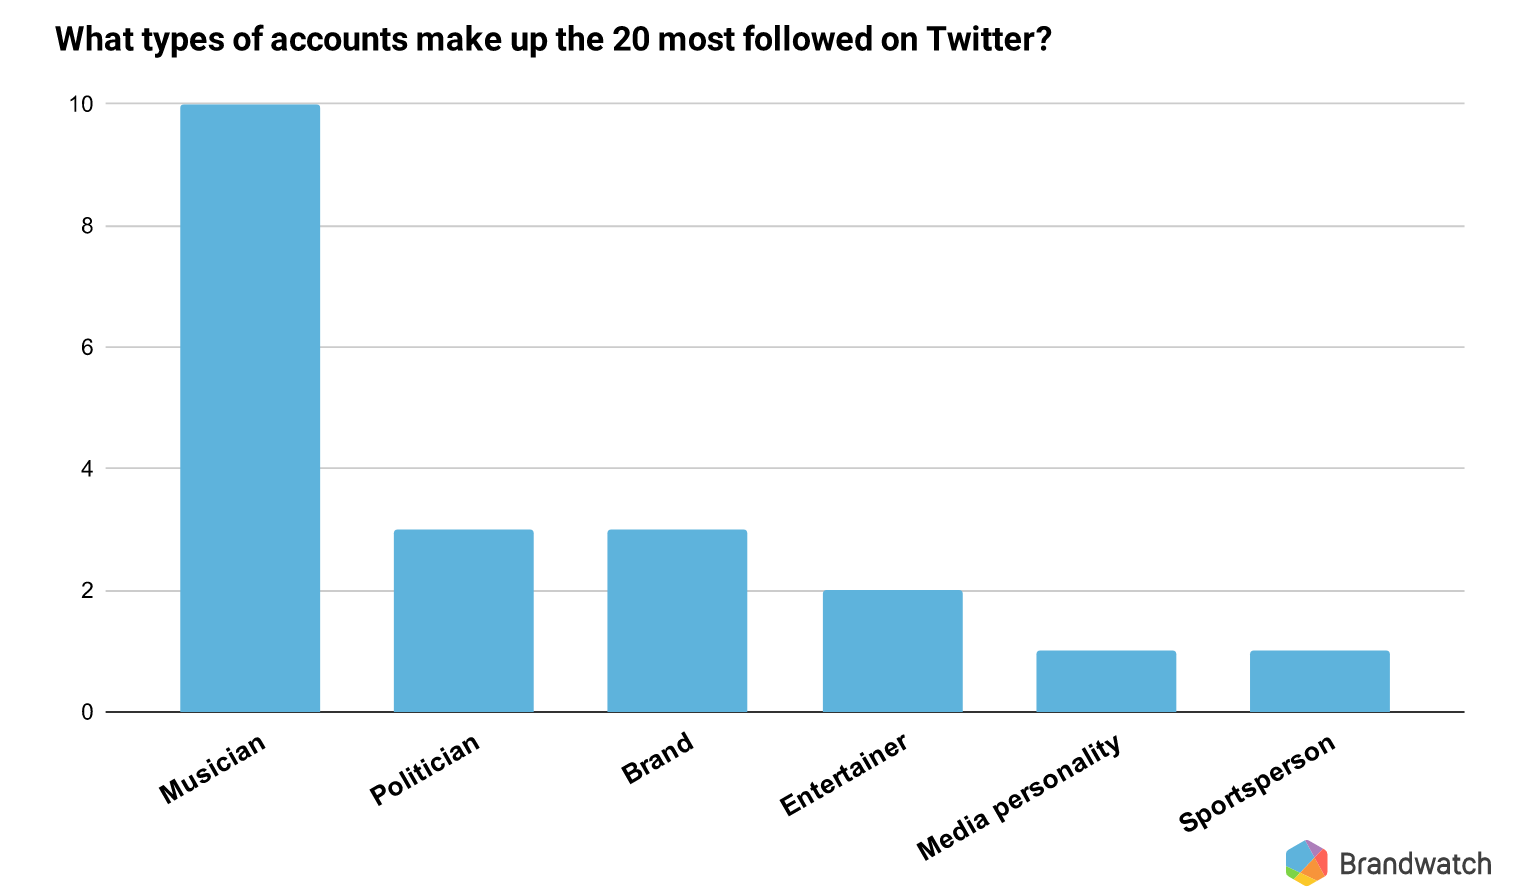

In [96]:
user_types = {'musicians': ['taylorswift13', 'shakira', 'selenagomez', 'rihanna', 'katyperry', 'justinbieber', 'jtimberlake', 'britneyspears', 'ArianaGrande'], 
             'politician': ['realDonaldTrump', 'narendramodi', 'BarackObama'],
             'brand': ['YouTube', 'Twitter', 'cnnbrk'], 
             'entertainer': ['jimmyfallon', 'TheEllenShow'],
             'media_personality': ['KimKardashian'],  
             'sportsperson': ['Cristiano']}

def get_user_type(user):
    for user_type in user_types:
        if user in user_types[user_type]:
            return user_type

df['user_type'] = df['user'].apply(get_user_type)

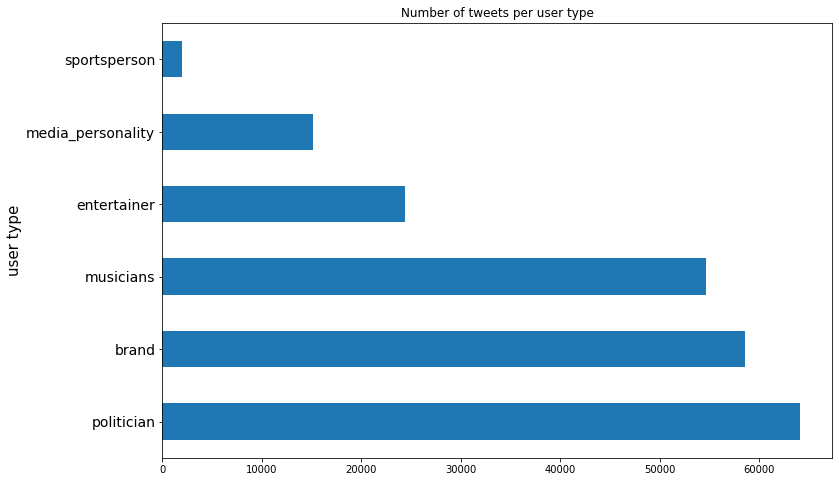

In [105]:
plt.figure(figsize=(12, 8))
df['user_type'].value_counts().plot(kind='barh');
plt.yticks(size=14);
plt.ylabel('user type', size=15);
plt.title('Number of tweets per user type');

In [108]:
preprocessor = TextPreprocessor(lowercase=True, clean_links=True, clean_punctuation=True, expand_contractions=True, remove_stop_words=True, 
                                process_numbers='remove', normalization_type='lemma', clean_mentions=True)

In [112]:
df['tokenized_tweet'] = df['tweet'].apply(preprocessor)

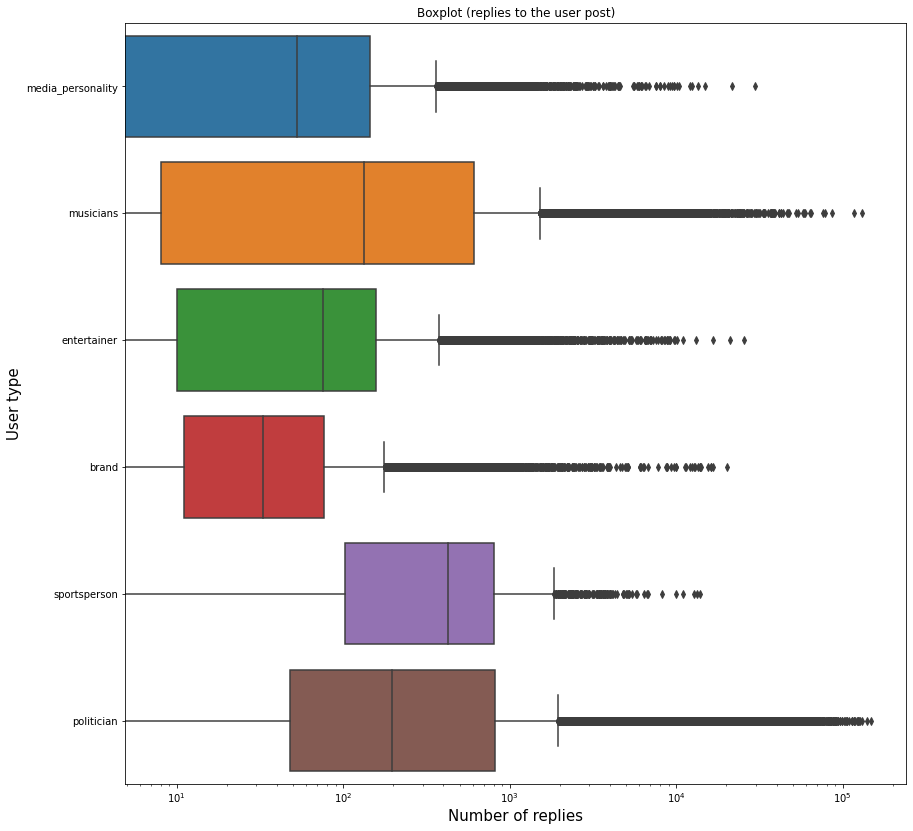

In [116]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xscale("log")
sns.boxplot(x="n_replies", y="user_type", data=df);
plt.ylabel('User type', size=15);
plt.xlabel('Number of replies', size=15);
plt.title("Boxplot (replies to the user post)");

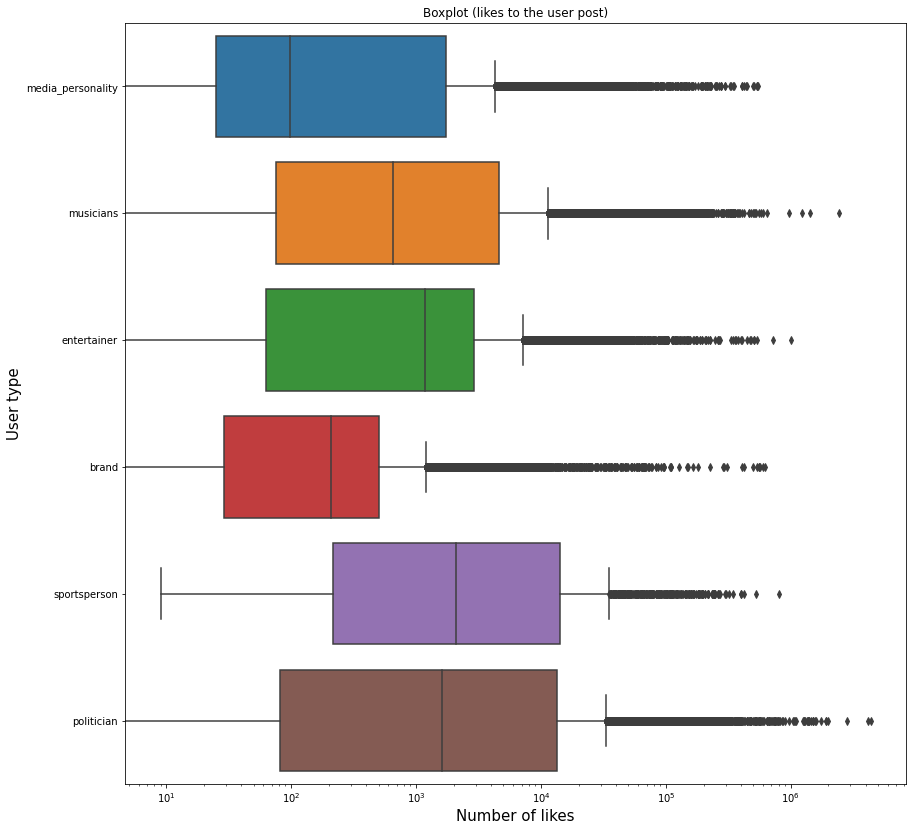

In [117]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xscale("log")
sns.boxplot(x="n_likes", y="user_type", data=df);
plt.ylabel('User type', size=15);
plt.xlabel('Number of likes', size=15);
plt.title("Boxplot (likes to the user post)");

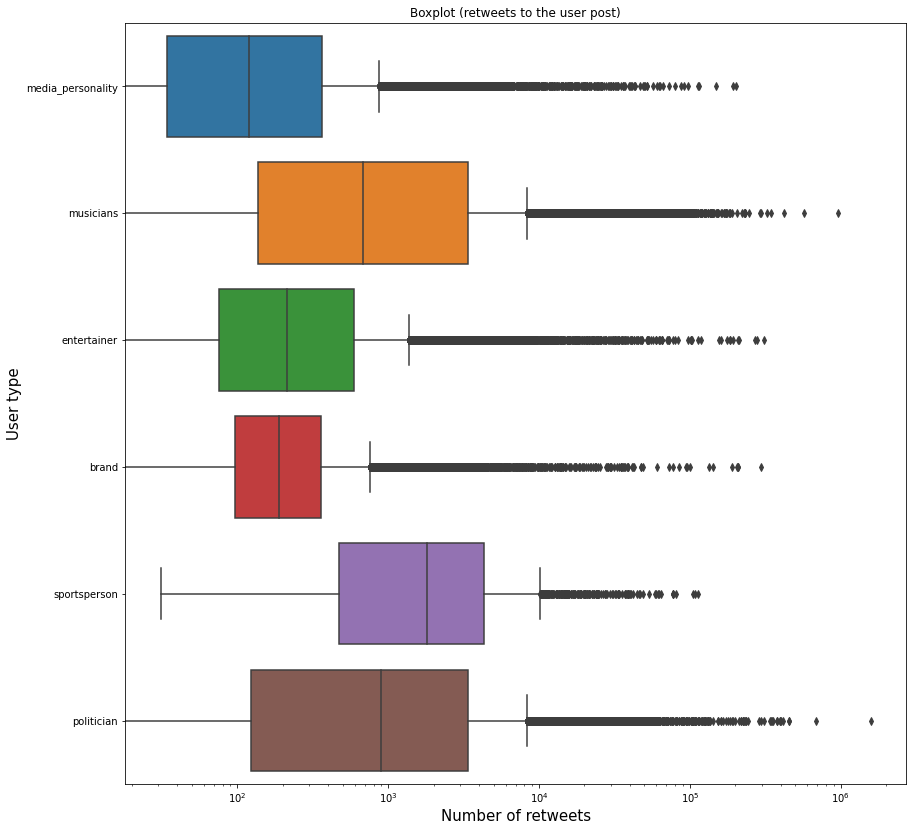

In [118]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xscale("log")
sns.boxplot(x="n_retweets", y="user_type", data=df);
plt.ylabel('User type', size=15);
plt.xlabel('Number of retweets', size=15);
plt.title("Boxplot (retweets to the user post)");

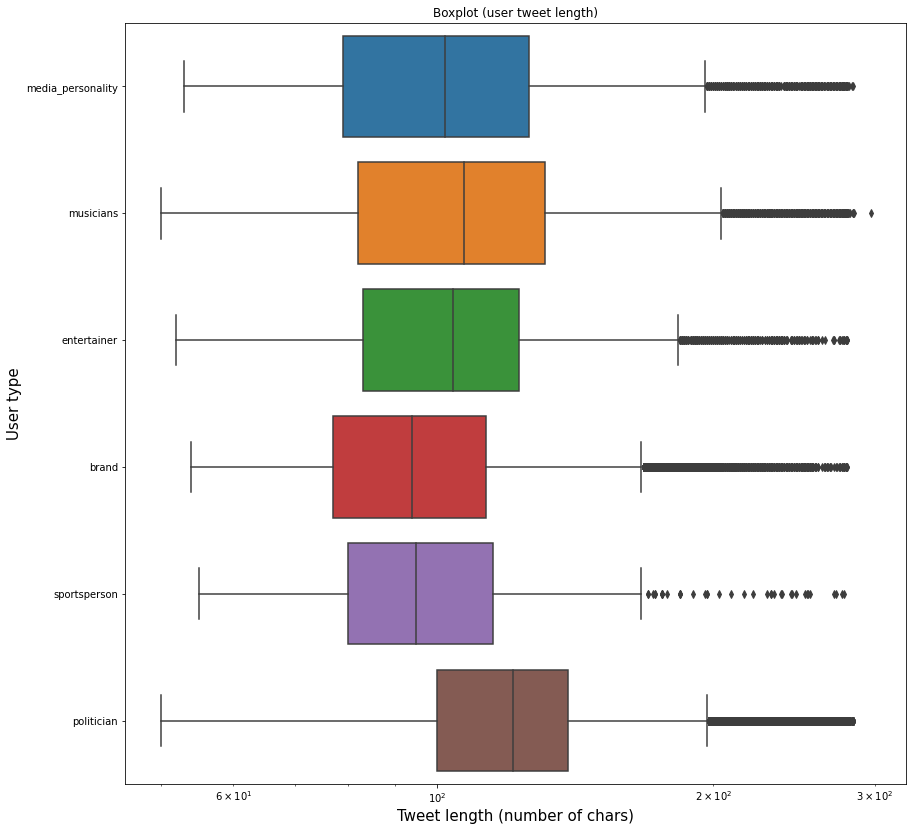

In [119]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xscale("log")
sns.boxplot(x=df['tweet'].apply(lambda tweet: len(tweet)), y="user_type", data=df);
plt.ylabel('User type', size=15);
plt.xlabel('Tweet length (number of chars)', size=15);
plt.title("Boxplot (user tweet length)");